In [5]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
from specim.specfuncs import spec1d

In [2]:
spec = Veldis('../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[3000, 16500])


Reading spectrum from ../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  5095.84
 Spectrum End:     8510.38
 Dispersion (1st pixel):   0.19
 Dispersion (average):      0.25



In [30]:
spec.cal_sis_veldis(1.8, 0.407, 2.74)


velocity dispersion assuming SIS mass profile is 290.146744


<Quantity 290.14674369>


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5276.25
[Fe VII]      3761.40       5292.29
H-iota        3770.00       5304.39
H-theta       3797.00       5342.38
H-eta         3835.00       5395.85
CN bandhd     3883.00       5463.38
CaII K        3933.67       5534.67
CaII H        3968.47       5583.64
H-delta       4101.00       5770.11
G-band        4305.00       6057.14
H-gamma       4340.00       6106.38
Fe4383        4383.00       6166.88
Ca4455        4455.00       6268.19
Fe4531        4531.00       6375.12
H-beta        4861.00       6839.43
Mg I (b)      5176.00       7282.63
Na I (D)      5889.95       8287.16
Na I (D)      5895.92       8295.56


Line        lambda_rest  lambda_obs
----------  -----------  -----------
[O II]        3726.03       5242.52
[O II]        3728.82       5246.45
H-delta       4101.00       5770.11
H-gamma       4340.00       6106.38
H-beta        4861.00       6839.43
[O III]       4962.00  

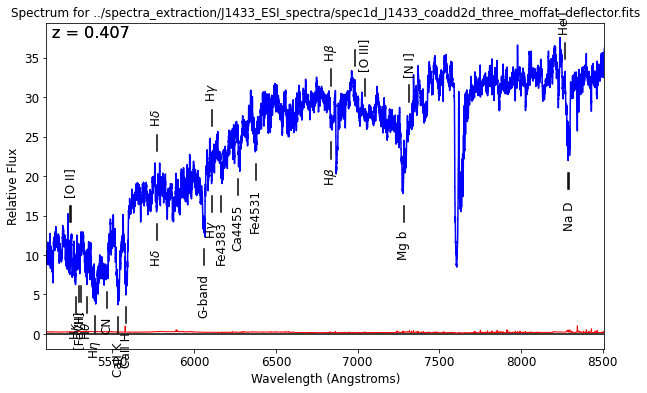

In [3]:
#%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec.smooth(11, fig=fg)
spec.mark_lines('abs', z=0.407, usesmooth=True)
spec.mark_lines('em', z=0.407, usesmooth=True)

Velocity scale = 11.389911 km/s


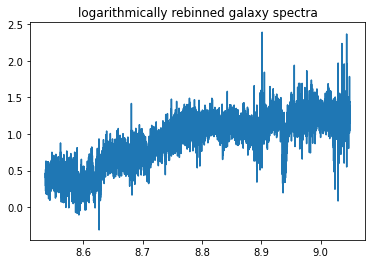

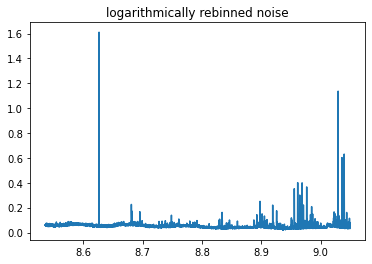

In [4]:
spec.cal_parm(z=0.407, high_z=False, logscale=True, veldis_start=200, noise_scale=0.05)

In [6]:
temp_sp = spec1d.Spec1d('../TEXT/100006.txt')


Reading spectrum from ../TEXT/100006.txt
Expected file format: text
 Spectrum Start:  3465.00
 Spectrum End:     9469.00
 Dispersion (1st pixel):   0.40
 Dispersion (average):      0.40



In [7]:
#temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=.85)# temp_num=500,
spec.gen_sigma_diff(wav_temp=temp_sp['wav'], sig_ins=0.85)


As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -115633.319277 

sigma_diff : 1.569009


1.5690089689323143

In [8]:
tm_data=np.loadtxt('logrebinned_template_array_for_esi_sig_ins.txt')

In [9]:
mask_reg = np.log(np.array([(5575, 5579), (6860, 6995), (7562, 7805)]))#/ (1+0.407))
print(mask_reg)

[[8.6260476  8.62676483]
 [8.83346272 8.85295089]
 [8.93089098 8.96251983]]



degree : 5
 Best Fit:       Vel     sigma
 comp.  0:    102396       276
chi2/DOF: 4.785; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1272

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    102396       274
chi2/DOF: 4.780; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1272

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    102367       200
chi2/DOF: 4.810; degree = 7; mdegree = 0
method = capfit; Jac calls: 1; Func calls: 5; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 1272

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    102397       270
chi2/DOF: 4.771; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  23 / 1272

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:    1023

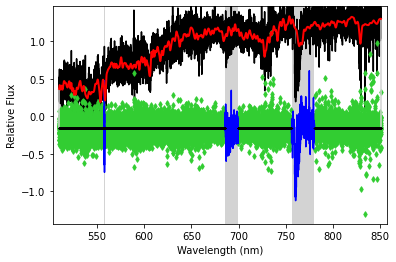

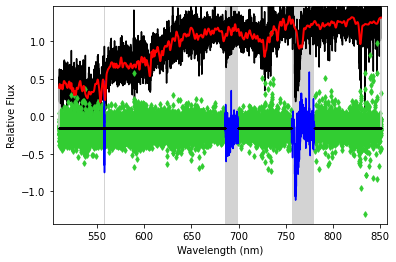

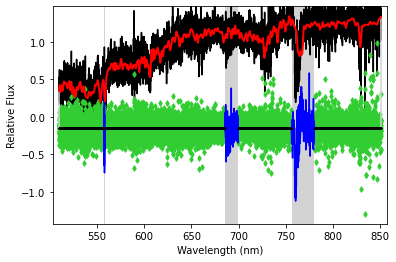

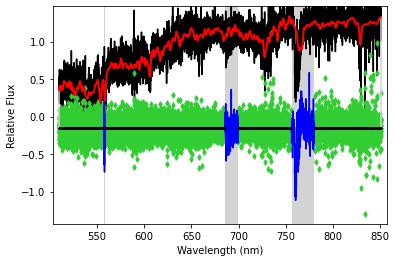

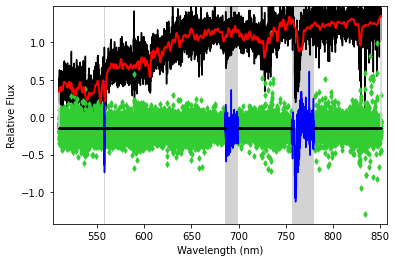

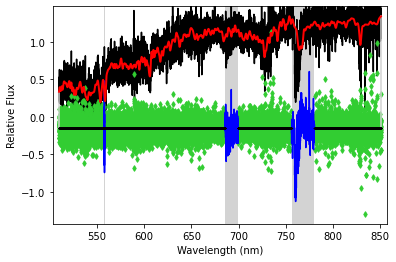

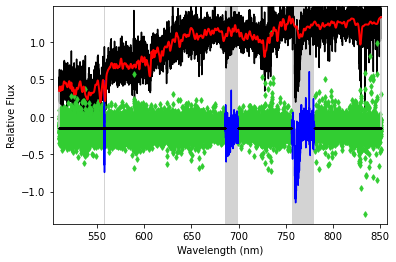

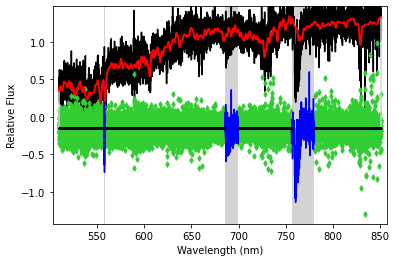

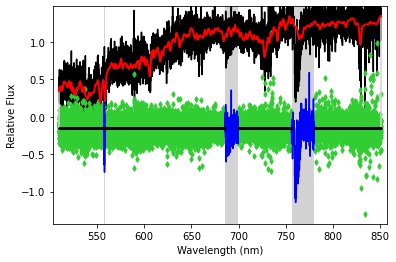

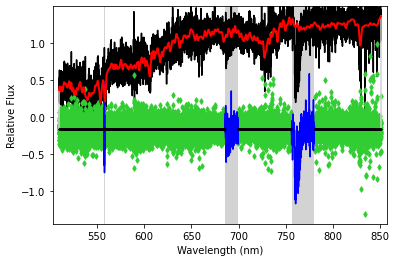

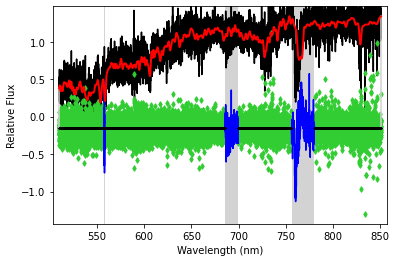

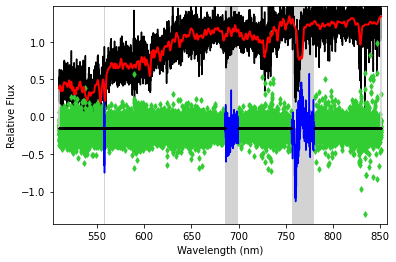

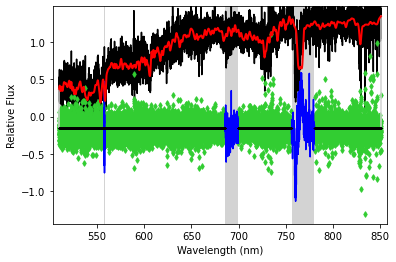

<Figure size 432x288 with 0 Axes>

In [10]:
spec.cal_veldis(temp_spec=tm_data, degree=[5, 18], mask_reg=mask_reg, show_weight=True, moments=2)


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:    102396       276
chi2/DOF: 478.5; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1272

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    102396       274
chi2/DOF: 478.0; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1272

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    102367       200
chi2/DOF: 481.0; degree = 7; mdegree = 0
method = capfit; Jac calls: 1; Func calls: 5; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 1272

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    102397       270
chi2/DOF: 477.1; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  23 / 1272

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:    1023

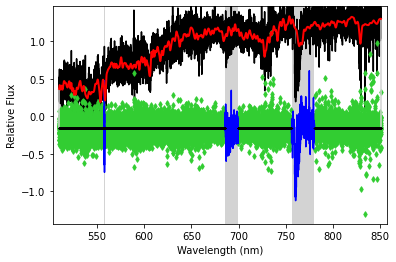

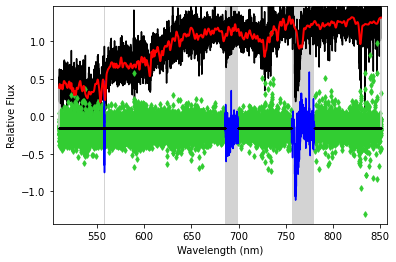

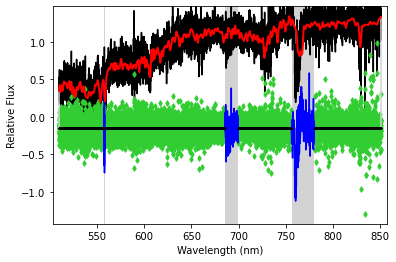

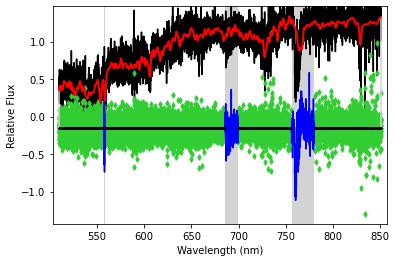

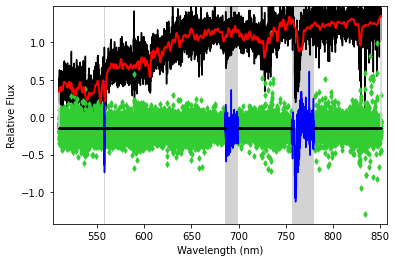

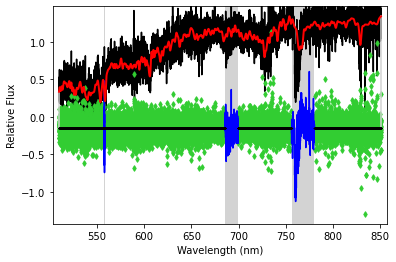

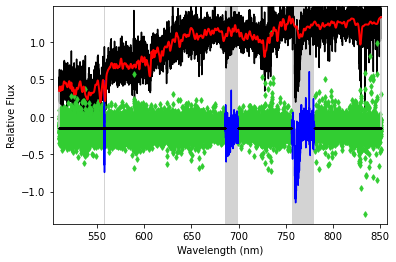

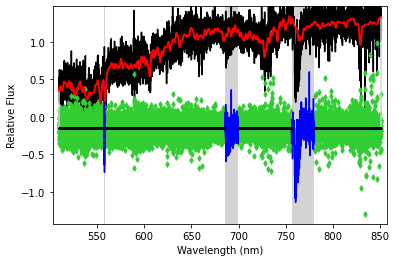

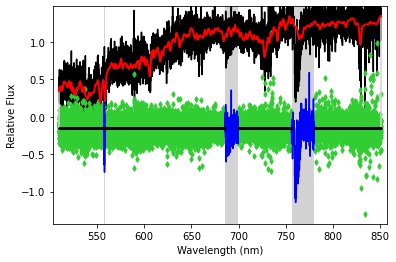

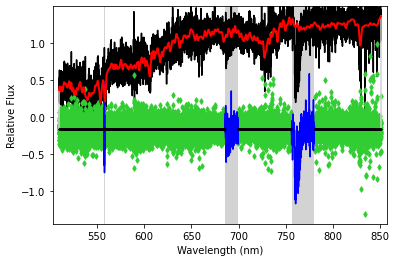

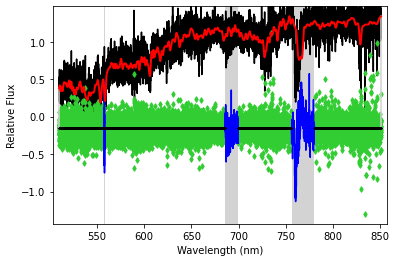

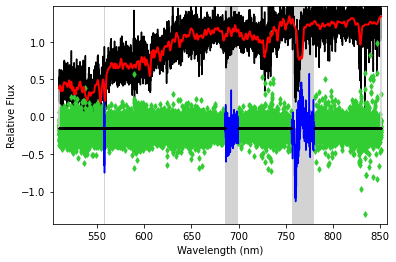

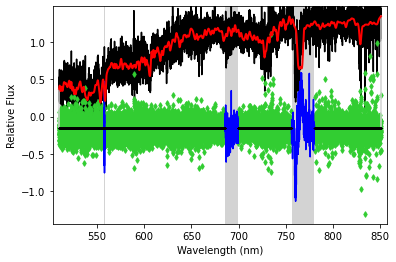

<Figure size 432x288 with 0 Axes>

In [35]:
spec.cal_veldis(temp_spec=temp_spec, degree=[5, 18], mask_reg=mask_reg, show_weight=True, moments=2)

order : 8


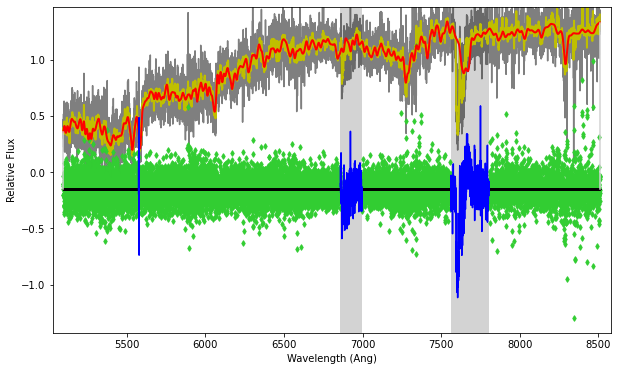

order : 10


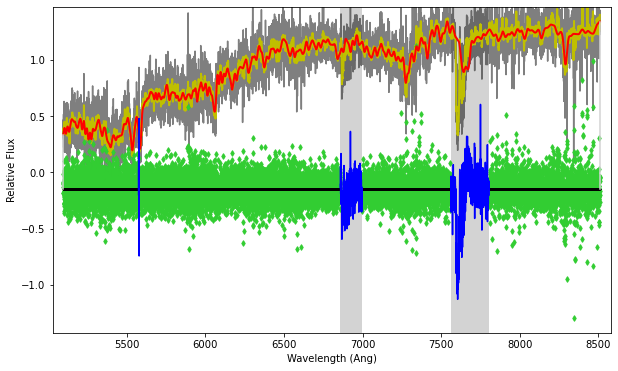

order : 12


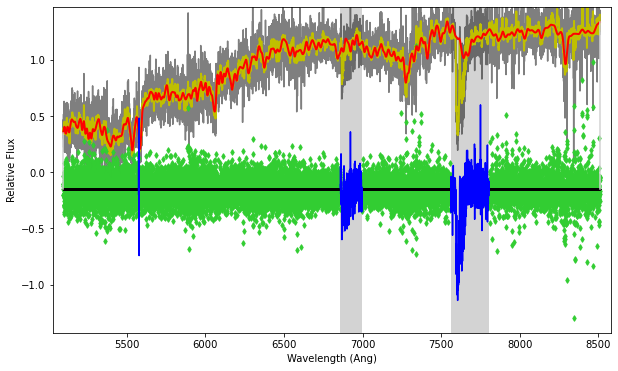

order : 14


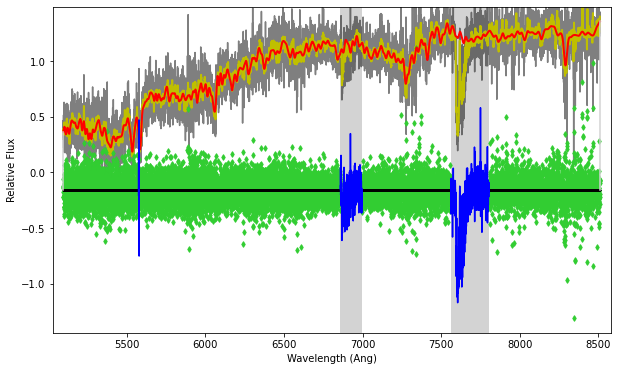

In [36]:
ord_list = np.array([8, 10, 12, 14])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

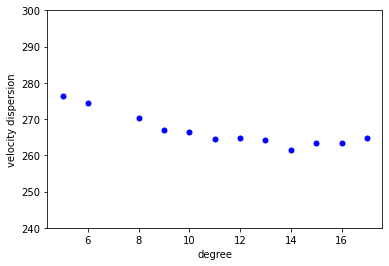

In [39]:
spec.plot_veldis(ylim=[240, 300])


degree : 5
 Best Fit:       Vel     sigma
 comp.  0:    102396       276
chi2/DOF: 478.5; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1272

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    102396       274
chi2/DOF: 478.0; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1272

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    102367       200
chi2/DOF: 481.0; degree = 7; mdegree = 0
method = capfit; Jac calls: 1; Func calls: 5; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 1272

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    102397       270
chi2/DOF: 477.1; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  23 / 1272

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:    1023

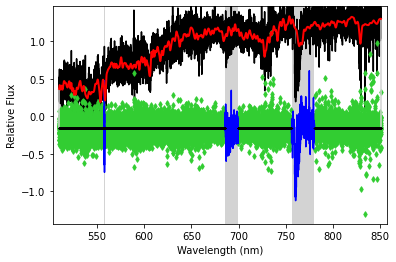

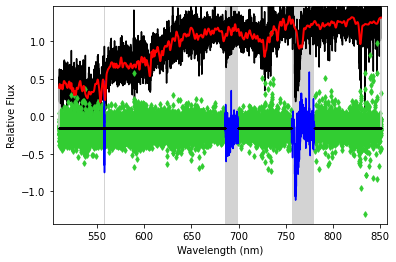

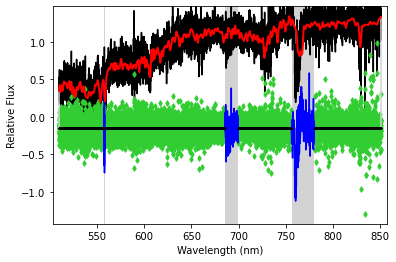

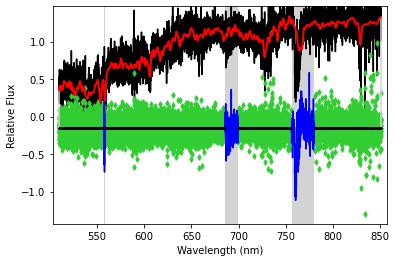

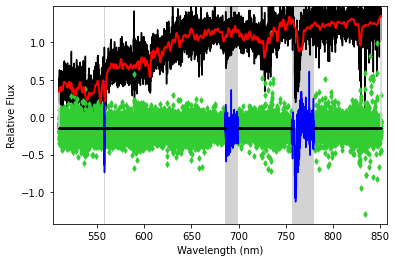

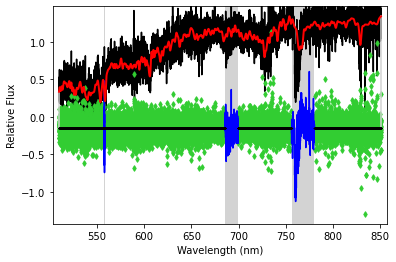

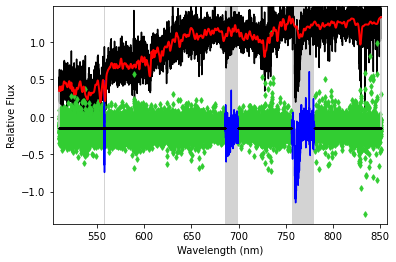

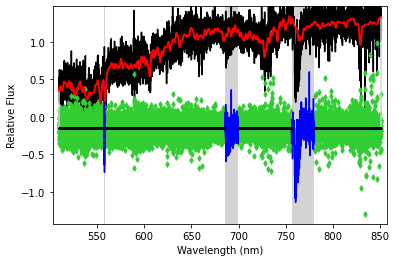

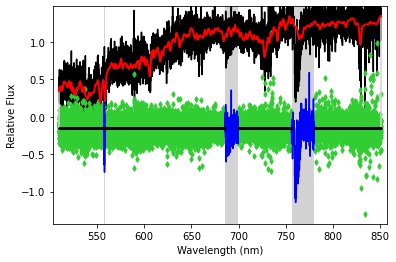

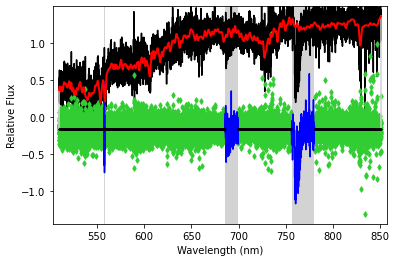

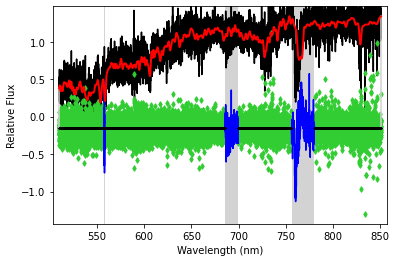

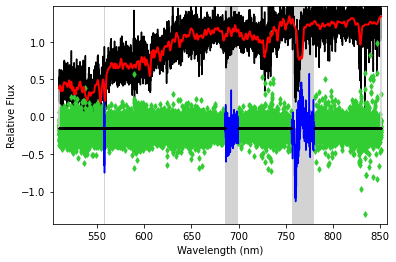

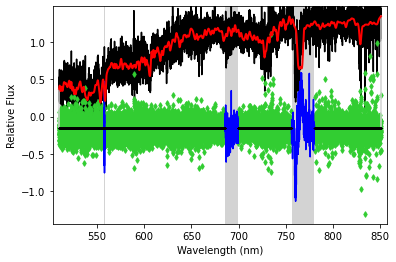

<Figure size 432x288 with 0 Axes>

In [40]:
spec.cal_veldis(temp_spec=tm_data, degree=[5, 18], mask_reg=mask_reg, show_weight=True, moments=2)

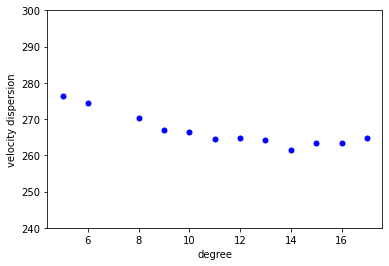

In [41]:
spec.plot_veldis(ylim=[240, 300])

## Blue side spectrum

In [19]:
spec_b = Veldis('../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits', 
              informat='fits',
              logwav=True,trimsec=[3000, 11350])


Reading spectrum from ../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  5095.84
 Spectrum End:     6998.00
 Dispersion (1st pixel):   0.19
 Dispersion (average):      0.23




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5276.25
[Fe VII]      3761.40       5292.29
H-iota        3770.00       5304.39
H-theta       3797.00       5342.38
H-eta         3835.00       5395.85
CN bandhd     3883.00       5463.38
CaII K        3933.67       5534.67
CaII H        3968.47       5583.64
H-delta       4101.00       5770.11
G-band        4305.00       6057.14
H-gamma       4340.00       6106.38
Fe4383        4383.00       6166.88
Ca4455        4455.00       6268.19
Fe4531        4531.00       6375.12
H-beta        4861.00       6839.43


Line        lambda_rest  lambda_obs
----------  -----------  -----------
[O II]        3726.03       5242.52
[O II]        3728.82       5246.45
H-delta       4101.00       5770.11
H-gamma       4340.00       6106.38
H-beta        4861.00       6839.43
[O III]       4962.00       6981.53



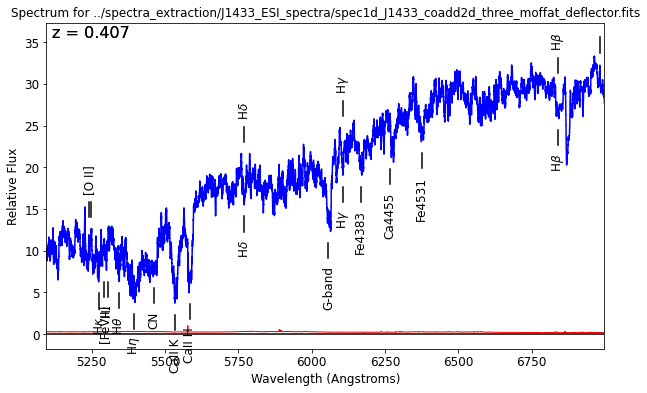

In [20]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(11, fig=fg)
spec_b.mark_lines('abs', z=0.407, usesmooth=True)
spec_b.mark_lines('em', z=0.407, usesmooth=True)

Velocity scale = 11.389911 km/s


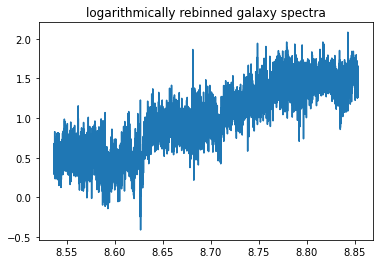

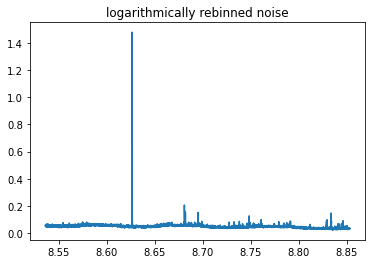

In [21]:
spec_b.cal_parm(z=0.407, high_z=False, logscale=True, veldis_start=200, noise_scale=0.05)

In [22]:
#temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=.85)# temp_num=500,
spec_b.gen_sigma_diff(wav_temp=temp_sp['wav'], sig_ins=0.85)


As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -115633.319277 

sigma_diff : 1.569009


1.5690089689323143

In [24]:
mask_reg_b = np.log(np.array([(5575, 5579), (6860, 6995)])) #/ (1+0.407))
print(mask_reg_b)

[[8.6260476  8.62676483]
 [8.83346272 8.85295089]]



degree : 5
 Best Fit:       Vel     sigma
 comp.  0:    102402       246
chi2/DOF: 8.589; degree = 5; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  20 / 1272

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    102396       251
chi2/DOF: 8.585; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 15; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  24 / 1272

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    102400       248
chi2/DOF: 8.585; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  24 / 1272

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    102398       246
chi2/DOF: 8.581; degree = 8; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  23 / 1272

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:    1023

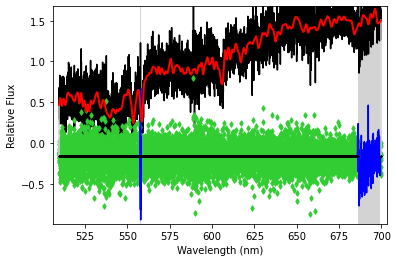

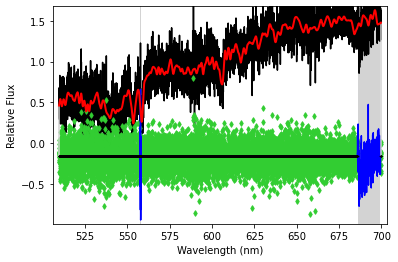

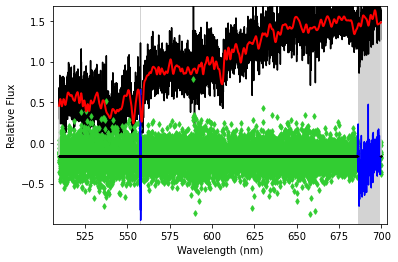

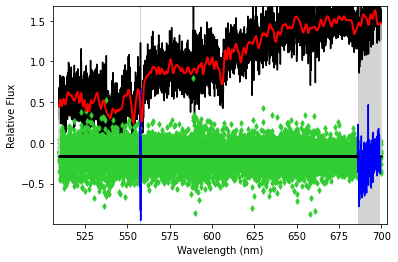

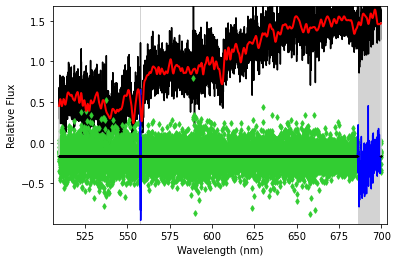

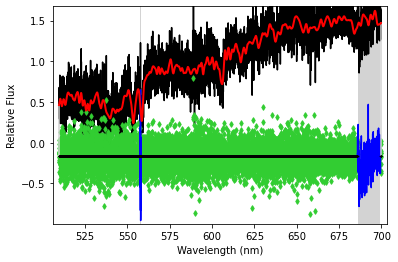

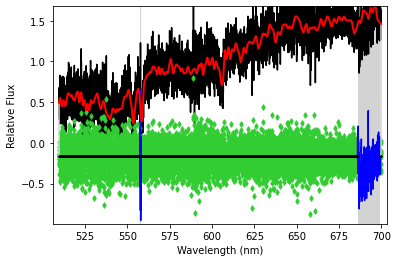

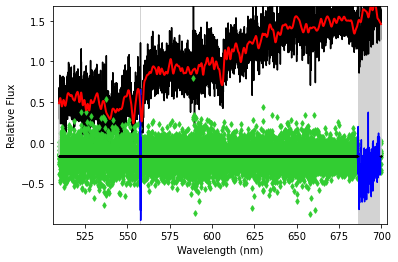

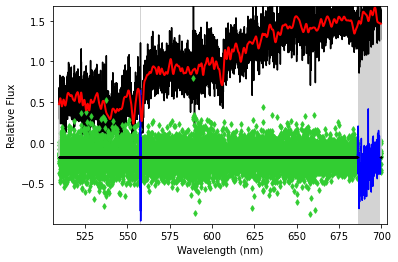

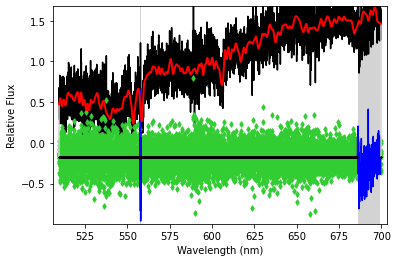

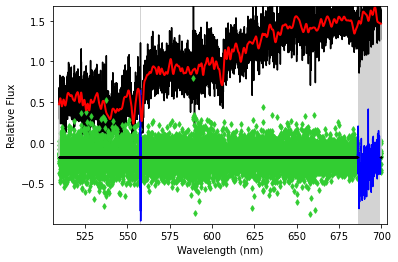

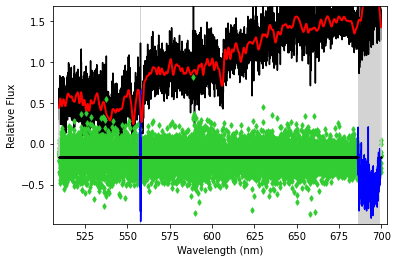

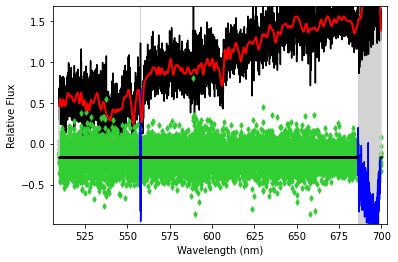

<Figure size 432x288 with 0 Axes>

In [25]:
spec_b.cal_veldis(temp_spec=tm_data, degree=[5, 18], mask_reg=mask_reg_b, show_weight=True, moments=2)

order : 6


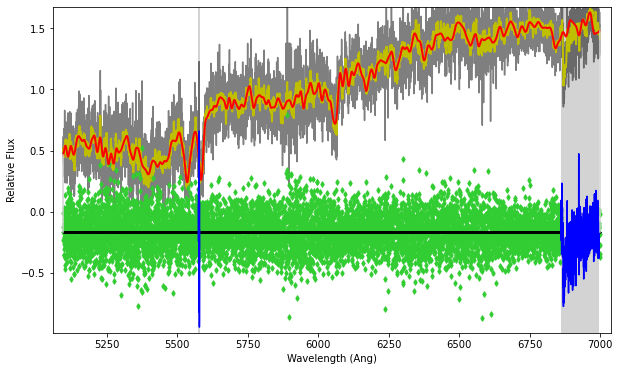

order : 8


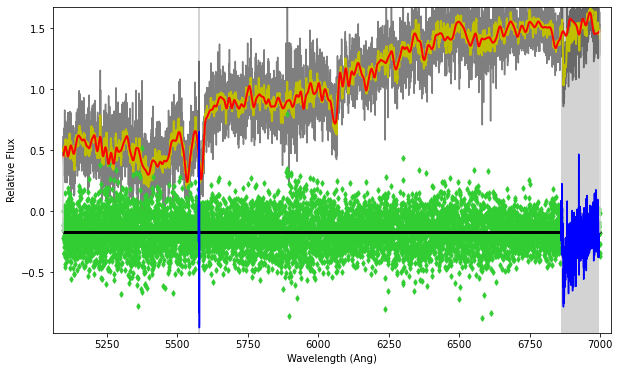

order : 10


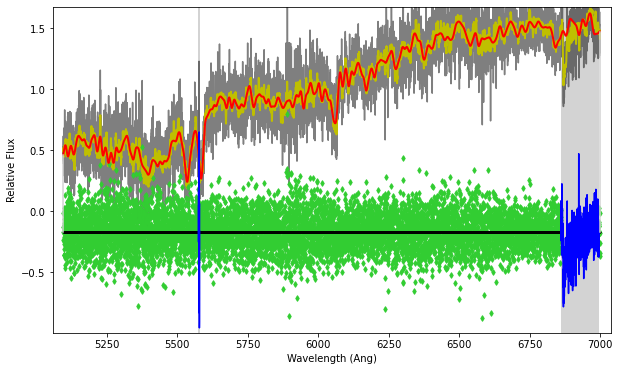

order : 12


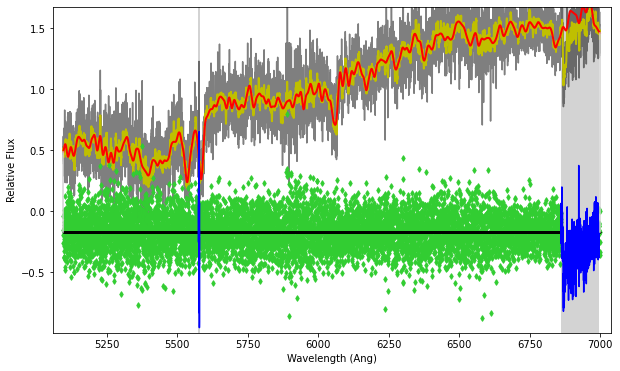

In [26]:
ord_list = np.array([6, 8, 10, 12])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

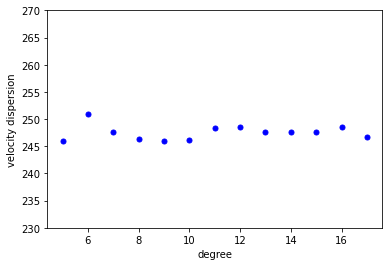

In [29]:
spec_b.plot_veldis(ylim=[230, 270])

## Red side spectra

In [33]:
spec_r = Veldis('../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits', 
              informat='fits',logwav=True,trimsec=[11350, 16500])


Reading spectrum from ../spectra_extraction/J1433_ESI_spectra/spec1d_J1433_coadd2d_three_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  6998.27
 Spectrum End:     8510.38
 Dispersion (1st pixel):   0.27
 Dispersion (average):      0.29




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I (b)      5176.00       7282.63
Na I (D)      5889.95       8287.16
Na I (D)      5895.92       8295.56


Line        lambda_rest  lambda_obs
----------  -----------  -----------
[O III]       5007.00       7044.85
[N I]         5199.00       7314.99
HeI           5876.00       8267.53



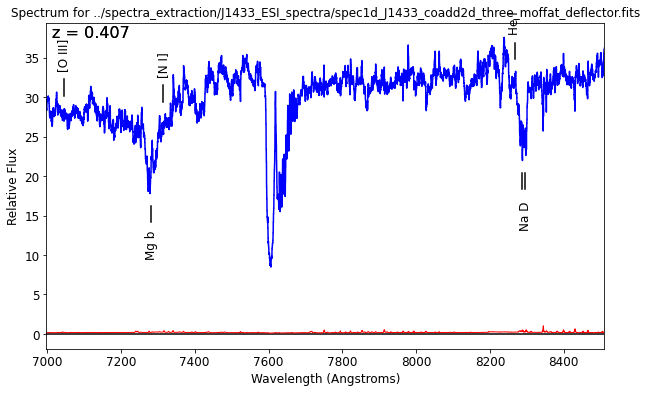

In [34]:
fg = plt.figure(figsize=(10,6))
spec_r.smooth(11, fig=fg)
spec_r.mark_lines('abs', z=0.407, usesmooth=True)
spec_r.mark_lines('em', z=0.407, usesmooth=True)

Velocity scale = 11.389911 km/s


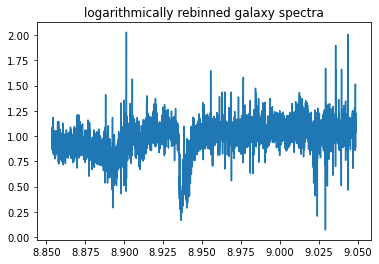

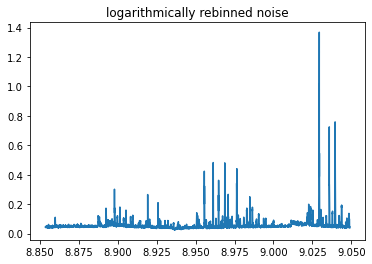

In [36]:
spec_r.cal_parm(z=0.407, high_z=False, logscale=True, veldis_start=350, noise_scale=0.05)

In [37]:
spec_r.gen_sigma_diff(wav_temp=temp_sp['wav'], sig_ins=0.85)


As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -210739.077287 

sigma_diff : 1.569009


1.5690089689323143

In [38]:
mask_reg_r = np.log(np.array([(6860, 6995), (7562, 7805)]))#/ (1+0.407))
print(mask_reg_r)

[[8.83346272 8.85295089]
 [8.93089098 8.96251983]]



degree : 5
 Best Fit:       Vel     sigma
 comp.  0:    102383       275
chi2/DOF: 2.844; degree = 5; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  19 / 1272

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:    102381       269
chi2/DOF: 2.843; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1272

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:    102381       260
chi2/DOF: 2.836; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1272

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:    102383       264
chi2/DOF: 2.829; degree = 8; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 1272

degree : 9
 Best Fit:       Vel     sigma
 comp.  0:    1023

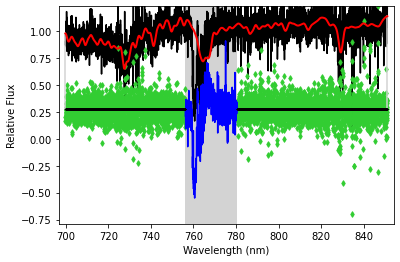

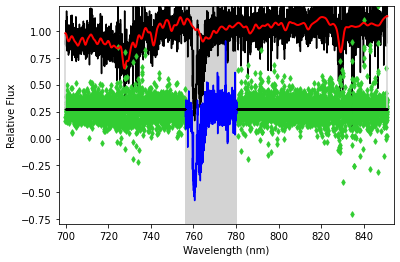

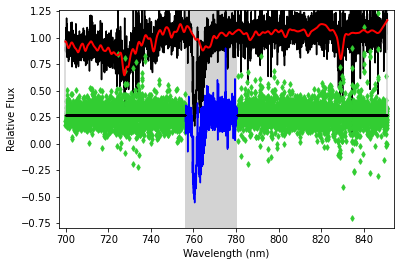

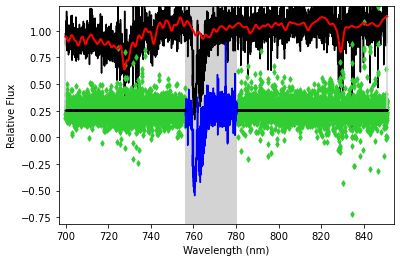

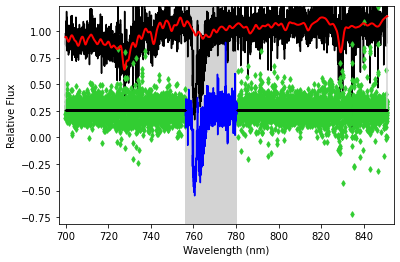

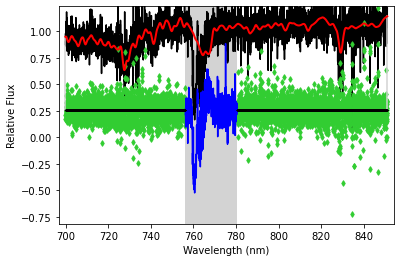

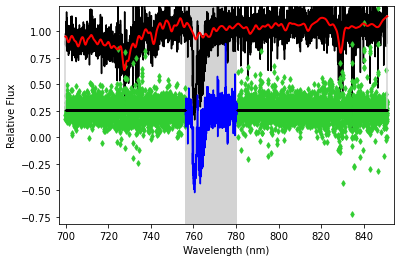

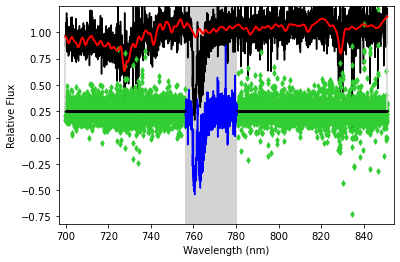

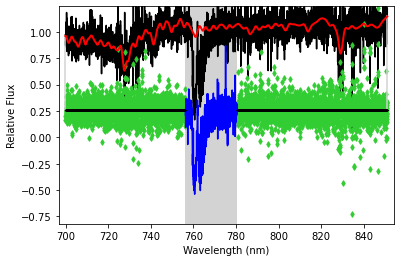

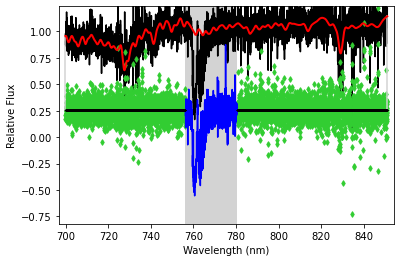

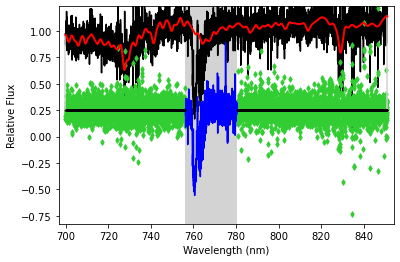

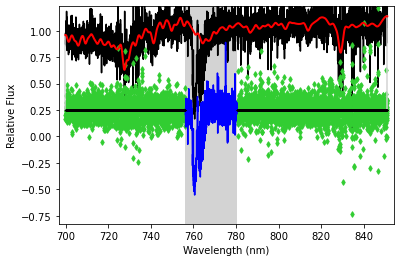

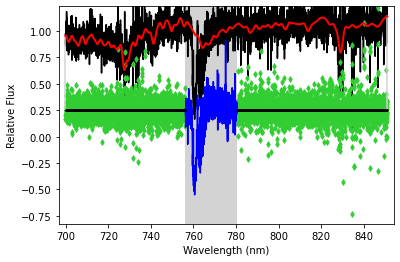

<Figure size 432x288 with 0 Axes>

In [39]:
spec_r.cal_veldis(temp_spec=tm_data, degree=[5, 18], mask_reg=mask_reg_r, show_weight=True, moments=2)

order : 6


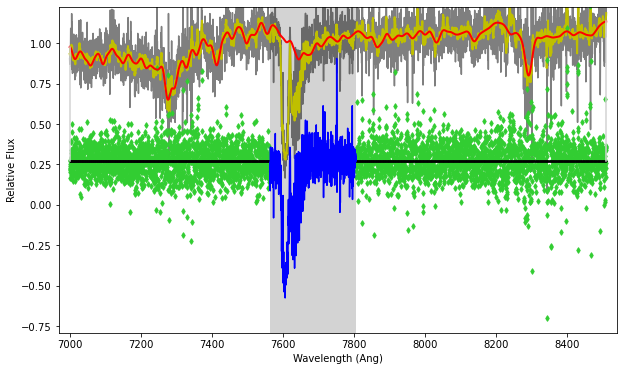

order : 8


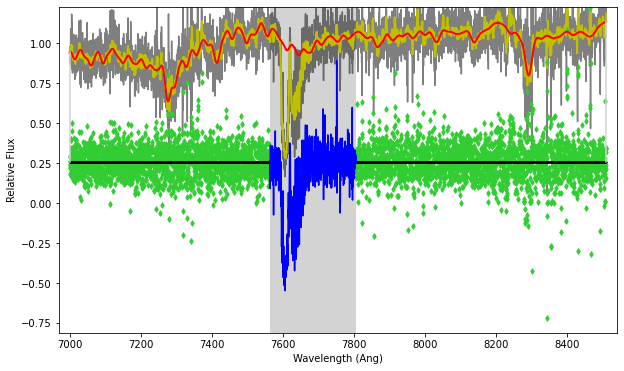

order : 10


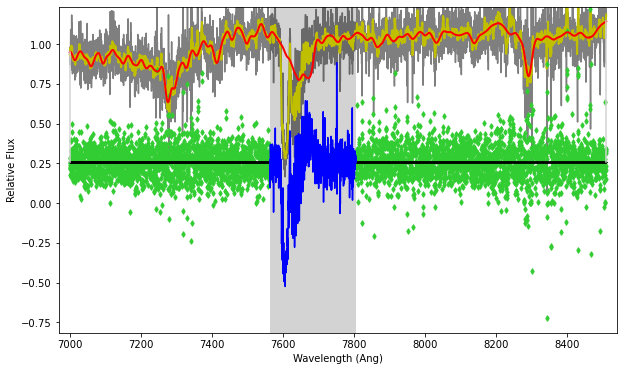

order : 12


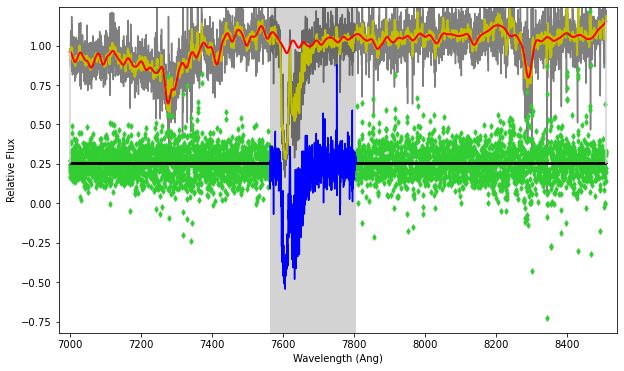

In [41]:
ord_list = np.array([6, 8, 10, 12])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

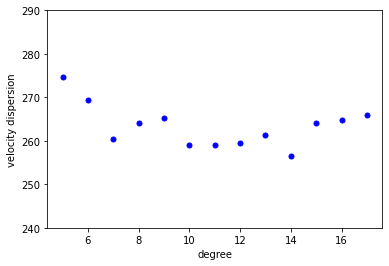

In [45]:
spec_r.plot_veldis(ylim=[240, 290])